In [1]:
# === IMPORTS ===
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
import joblib
from add_preprocessing import load_and_prepare_data, create_preprocessor

# === LOAD & PREPARE DATA ===
X, y = load_and_prepare_data("../Motor_vehicle_insurance_data.csv")
preprocessor = create_preprocessor(X)

# === STRATIFIED TRAIN-TEST SPLIT ===
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_idx, test_idx in sss.split(X, y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

# === BUILD BETTER MODEL PIPELINE ===
model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier(
        n_estimators=591,
        learning_rate=0.03641393572462343,
        max_depth=9,
        min_samples_leaf=30,
        min_samples_split=180,
        subsample=0.9187021504122961,
        random_state=42,
    ))
])

# === TRAINING ===
model.fit(X_train, y_train)

# === EXPORT MODEL ===
joblib.dump(model, "../models/gradient_boost_model_hyperparameter.pkl")
print("✅ Improved Gradient Boosting model trained and saved!")

/Users/alper/Desktop/cse2600/model_codes/add_preprocessing.py:14: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath, delimiter=delimiter)


✅ Improved Gradient Boosting model trained and saved!


/Users/alper/Desktop/cse2600/model_codes/add_preprocessing.py:14: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath, delimiter=delimiter)


✅ Loaded raw data and split into train/test.
✅ Loaded hyperparameterized Gradient Boosting model.

✅ Gradient Boosting Model Evaluation
----------------------------------------
Accuracy: 0.9029
ROC AUC Score: 0.9493

Classification Report:

              precision    recall  f1-score   support

           0       0.92      0.58      0.71      4361
           1       0.90      0.99      0.94     16750

    accuracy                           0.90     21111
   macro avg       0.91      0.78      0.83     21111
weighted avg       0.90      0.90      0.89     21111



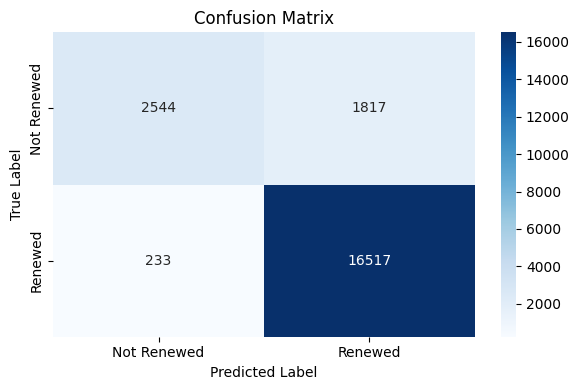

In [5]:
# === IMPORTS ===
import joblib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix, roc_auc_score
)
from sklearn.model_selection import train_test_split
from add_preprocessing import load_and_prepare_data

# === LOAD RAW DATA ===
X_raw, y_raw = load_and_prepare_data("../Motor_vehicle_insurance_data.csv")
X_train_raw, X_test_raw, y_train_raw, y_test_raw = train_test_split(
    X_raw, y_raw, test_size=0.2, random_state=42
)
print("✅ Loaded raw data and split into train/test.")

# === LOAD SAVED MODEL (full pipeline) ===
model = joblib.load("../models/gradient_boost_model_hyperparameter.pkl")
print("✅ Loaded hyperparameterized Gradient Boosting model.")

# === PREDICT ===
y_pred = model.predict(X_test_raw)
y_prob = model.predict_proba(X_test_raw)[:, 1]

# === EVALUATE ===
print("\n✅ Gradient Boosting Model Evaluation")
print("-" * 40)
print(f"Accuracy: {accuracy_score(y_test_raw, y_pred):.4f}")
print(f"ROC AUC Score: {roc_auc_score(y_test_raw, y_prob):.4f}")
print("\nClassification Report:\n")
print(classification_report(y_test_raw, y_pred))

# === CONFUSION MATRIX ===
conf_matrix = confusion_matrix(y_test_raw, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues",
            xticklabels=['Not Renewed', 'Renewed'],
            yticklabels=['Not Renewed', 'Renewed'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()